# FCM training based on Hopfield NN

## Learning algorithms for Fuzzy Cognitive Maps

This notebook is an implementation of the Hopfield Neural Network training algorithm as proposed in section 4.2 of ref 1.


## Dependencies

NetworkX is a python library for modeling complex networks. Matplotlib is for ploting, this is a jupyter notebook, hosted at github.

In [17]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from nx_plot import draw_graph

## Example

In [2]:
c = [0.32, 0.4, 0.45]

w = [[ 0, -1, 1],
     [ 1,  0, 1],
     [-1,  1, 0]]

## Load to NetworkX

  (0, 1)	-1
  (0, 2)	1
  (1, 0)	1
  (1, 2)	1
  (2, 0)	-1
  (2, 1)	1


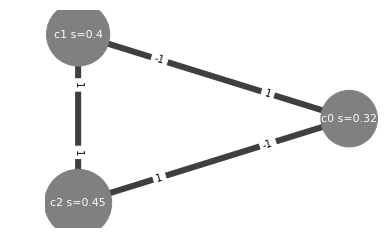

In [24]:
# create directed graph from adjacency matrix w
g = nx.DiGraph(np.matrix(w))  

# set node states
for n in g.nodes:
    g.add_node(n, s=c[n])

    
# sanity check
print nx.adjacency_matrix(g)

draw_graph(g)

## Time Step procedure

At each time step the simulation must run procedures for updating node states and edge weights.

In [7]:
def update_weights(g):
    h = g.copy()
    for e in h.edges():
        w = h.get_edge_data(*e)['w']

        W = w + ((2 * g.node[e[0]]['s']) - 1) * ((2 * g.node[e[1]]['s']) - 1)


In [18]:
def update_states(g):
    pass